# 청소년 정신건강 분석
- https://data.seoul.go.kr/dataList/10956/S/2/datasetView.do

In [1]:
import pandas as pd
file_path="./ref/청소년정신건강20250304_1.csv"
ori = pd.read_csv(file_path)
ori

,시점,스트레스 인지율,스트레스 인지율.1,스트레스 인지율.2,우울감 경험률,우울감 경험률.1,우울감 경험률.2,자살 생각률,자살 생각률.1,자살 생각률.2
0,시점,전체,남학생,여학생,전체,남학생,여학생,전체,남학생,여학생
1,2023,39.6,33.4,46.2,27.5,23.3,32.0,14.5,10.5,18.9
2,2024,45.3,39.6,51.3,28.2,23.9,32.6,14.2,11.1,17.4


In [2]:
# 컬럼명 지정
new_name = ['시점','스트레스','스트레스남학생','스트레스여학생','우울감경험율','우울남학생', '우울여학생','자살생각율','자살남학생','자살여학생']
ori.columns= new_name
ori

,시점,스트레스,스트레스남학생,스트레스여학생,우울감경험율,우울남학생,우울여학생,자살생각율,자살남학생,자살여학생
0,시점,전체,남학생,여학생,전체,남학생,여학생,전체,남학생,여학생
1,2023,39.6,33.4,46.2,27.5,23.3,32.0,14.5,10.5,18.9
2,2024,45.3,39.6,51.3,28.2,23.9,32.6,14.2,11.1,17.4


In [3]:
ori2=ori.copy()
ori= ori[ori['시점'] == '2023']
ori
ori2= ori2[ori2['시점'] == '2024']
ori2

,시점,스트레스,스트레스남학생,스트레스여학생,우울감경험율,우울남학생,우울여학생,자살생각율,자살남학생,자살여학생
2,2024,45.3,39.6,51.3,28.2,23.9,32.6,14.2,11.1,17.4


In [4]:
# # 시점을 없애고, 0번 행도 없앰.
ori=ori.loc[1:,'시점':]
ori
# 시점을 없애고, 0번 행도 없앰.
ori2=ori2.loc[1:,'시점':]
ori2

,시점,스트레스,스트레스남학생,스트레스여학생,우울감경험율,우울남학생,우울여학생,자살생각율,자살남학생,자살여학생
2,2024,45.3,39.6,51.3,28.2,23.9,32.6,14.2,11.1,17.4


In [5]:
ori=ori.copy()
# 2번 인덱스 행을 생성 , 100에서 값을 뺀 값
ori.loc[2] = 100 - ori.loc[1,'스트레스':].astype(float)
# 마지막에 응답컬럼을 생성, 그렇다 or 아니다.
ori['응답'] = ['그렇다','아니다']
ori

ori2=ori2.copy()
# 2번 인덱스 행을 생성 , 100에서 값을 뺀 값
ori2.loc[3] = 100 - ori2.loc[2,'스트레스':].astype(float)
# 마지막에 응답컬럼을 생성, 그렇다 or 아니다.
ori2['응답'] = ['그렇다','아니다']
ori2

,시점,스트레스,스트레스남학생,스트레스여학생,우울감경험율,우울남학생,우울여학생,자살생각율,자살남학생,자살여학생,응답
2,2024,45.3,39.6,51.3,28.2,23.9,32.6,14.2,11.1,17.4,그렇다
3,NaN,54.7,60.4,48.7,71.8,76.1,67.4,85.8,88.9,82.6,아니다


In [6]:
# 응답 을 기준 인덱스가 정리
ori = ori.set_index('응답') # 컬럼 하나를 인덱스로 지정
ori

# 응답 을 기준 인덱스가 정리
ori2 = ori2.set_index('응답') # 컬럼 하나를 인덱스로 지정
ori2

,시점,스트레스,스트레스남학생,스트레스여학생,우울감경험율,우울남학생,우울여학생,자살생각율,자살남학생,자살여학생
응답,,,,,,,,,,
그렇다,2024,45.3,39.6,51.3,28.2,23.9,32.6,14.2,11.1,17.4
아니다,NaN,54.7,60.4,48.7,71.8,76.1,67.4,85.8,88.9,82.6


In [7]:
# OS에 사용가능한, 설치된 폰트를 나열
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.font_manager as fm
fontlist = fm.findSystemFonts(fontpaths=None, fontext='ttf')
fontlist

['C:\\Windows\\Fonts\\PERBI___.TTF',
 'C:\\Windows\\Fonts\\ROCK.TTF',
 'C:\\Windows\\Fonts\\HANWing2.ttf',
 'C:\\Windows\\Fonts\\MSUIGHUR.TTF',
 'C:\\Windows\\Fonts\\OCRAEXT.TTF',
 'C:\\Windows\\Fonts\\HANBatang.ttf',
 'C:\\Windows\\Fonts\\phagspab.ttf',
 'C:\\Windows\\Fonts\\FRSCRIPT.TTF',
 'C:\\Windows\\Fonts\\l_10646.ttf',
 'C:\\Windows\\Fonts\\msyhbd.ttc',
 'C:\\Windows\\Fonts\\PERTILI.TTF',
 'C:\\Windows\\Fonts\\javatext.ttf',
 'C:\\Windows\\Fonts\\Candarali.ttf',
 'C:\\Windows\\Fonts\\CALIFR.TTF',
 'C:\\Windows\\Fonts\\BOOKOS.TTF',
 'C:\\Windows\\Fonts\\Inkfree.ttf',
 'C:\\Windows\\Fonts\\timesi.ttf',
 'C:\\Windows\\Fonts\\arialbi.ttf',
 'C:\\Windows\\Fonts\\LSANSI.TTF',
 'C:\\Windows\\Fonts\\TCM_____.TTF',
 'C:\\Windows\\Fonts\\H2MKPB.TTF',
 'C:\\Windows\\Fonts\\RAVIE.TTF',
 'C:\\Windows\\Fonts\\simsun.ttc',
 'C:\\Windows\\Fonts\\msjhbd.ttc',
 'C:\\Windows\\Fonts\\AGENCYB.TTF',
 'C:\\Windows\\Fonts\\H2GTRM.TTF',
 'C:\\Windows\\Fonts\\COOPBL.TTF',
 'C:\\Windows\\Fonts\\ANTQUAI.TT

Text(0.3, 0.3, '한글')

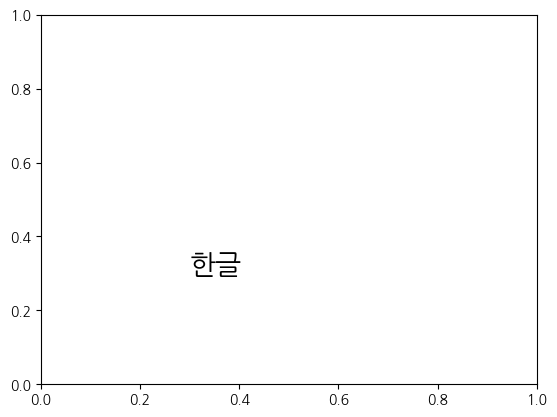

In [8]:
# 윈도우용 폰트  경로 설정
path= "C:\\Windows\\Fonts\\NanumGothic.ttf"
font_name = fm.FontProperties(fname=path).get_name()
rc('font',family=font_name)
plt.text(0.3,0.3,'한글', size=20)

<Axes: ylabel='스트레스'>

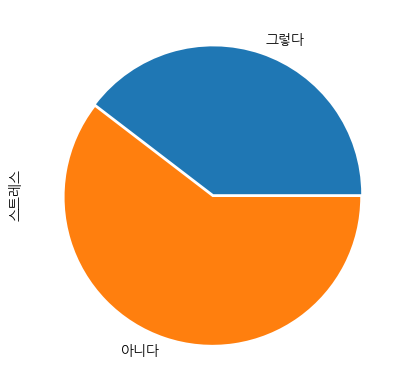

In [9]:
ori['스트레스'].astype(float).plot.pie(explode = [0,0.02])
ori2['스트레스'].astype(float).plot.pie(explode = [0,0.02])

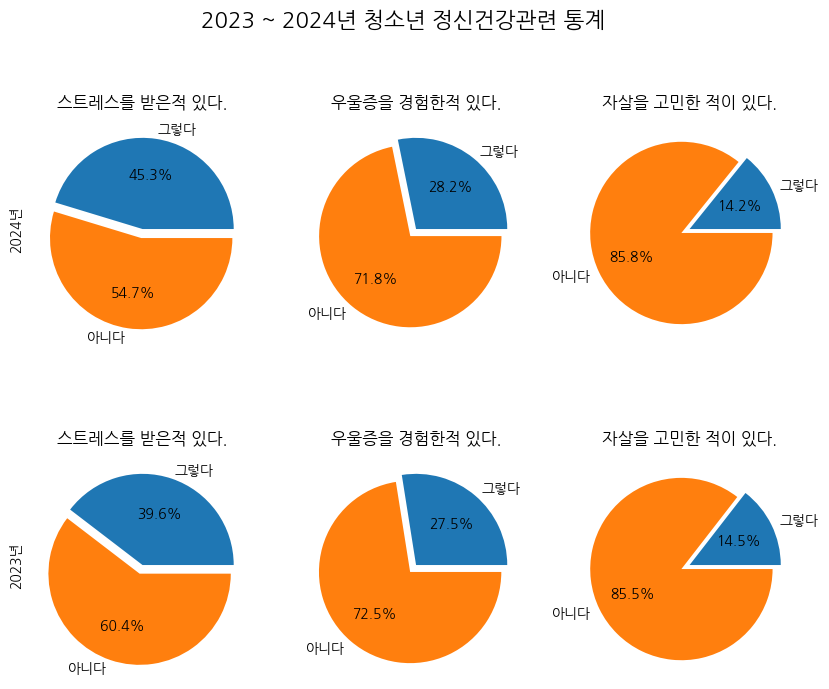

In [17]:
fig , ax = plt.subplots(2,3,figsize=(10,8)) 

ori['스트레스'].astype(float).plot.pie(explode = [0, 0.1], ax = ax[1][0], autopct="%.1f%%")
ori2['스트레스'].astype(float).plot.pie(explode = [0, 0.1], ax = ax[0][0], autopct="%.1f%%")
ax[1][0].set_title('스트레스를 받은적 있다.')
ax[0][0].set_title('스트레스를 받은적 있다.')
ax[1][0].set_ylabel('2023년')
ax[0][0].set_ylabel('2024년')

ori['우울감경험율'].astype(float).plot.pie(explode = [0, 0.1], ax = ax[1][1], autopct="%.1f%%")
ori2['우울감경험율'].astype(float).plot.pie(explode = [0, 0.1], ax = ax[0][1], autopct="%.1f%%")
ax[1][1].set_title('우울증을 경험한적 있다.')
ax[0][1].set_title('우울증을 경험한적 있다.')
ax[1][1].set_ylabel('')
ax[0][1].set_ylabel('')

ori['자살생각율'].astype(float).plot.pie(explode = [0, 0.1], ax = ax[1][2], autopct="%.1f%%")
ori2['자살생각율'].astype(float).plot.pie(explode = [0, 0.1], ax = ax[0][2], autopct="%.1f%%")
ax[1][2].set_title('자살을 고민한 적이 있다.')
ax[0][2].set_title('자살을 고민한 적이 있다.')
ax[1][2].set_ylabel('')
ax[0][2].set_ylabel('')

plt.suptitle('2023 ~ 2024년 청소년 정신건강관련 통계',fontsize=16)
plt.show()

# 청소년 정신건강 분석 리포트
- 2023년과 2024년를 비교분석한 내용이다.
- 2023년도엔 스트레스를 받은 학생이 40프로에 달하고 내년엔 5프로 가까이 올라 스트레스를 더겪는것으로 밝혀졌다.
- 우울증을 고민한 학생은 4명중 1명, 자살을 고민한 학생은 100명중 14명 가까이 된다.
- 위의 자료를 보았을 때 대부분의 학생들은 스트레스를 안고 살아가고 있으며, 그들 중 적지 않은 수가 우울증과 자살까지 고민한 것으로 보인다.